In [ ]:
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras import models
from keras import layers

In [ ]:
from tensorflow.keras.preprocessing import  image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    '/content/drive/MyDrive/Dogs_vs_cats_database/train_dvc',  # This is the target directory
    labels='inferred',
    label_mode="binary", # Since we use binary_crossentropy loss, we need binary labels
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150), # All images have different sizes and will be resized to 150x150
    shuffle=True,
)

Found 2000 files belonging to 2 classes.


In [ ]:
val_dataset = image_dataset_from_directory(
    '/content/drive/MyDrive/Dogs_vs_cats_database/validation_dvc',  # This is the target directory
    labels='inferred',
    label_mode="binary", # Since we use binary_crossentropy loss, we need binary labels
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150), # All images have different sizes and will be resized to 150x150
    shuffle=True,
)

Found 1000 files belonging to 2 classes.


In [ ]:
model1 = models.Sequential()
model1.add(layers.Rescaling(scale=1./255, input_shape=(150,150,3)))
model1.add(layers.Conv2D(32, (3,3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3,3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3,3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3,3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))
model1.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)      

In [ ]:
hismod1 = model1.fit(train_dataset, epochs=30, validation_data=val_dataset)

Epoch 1/30
100/100 [==============================] - 10s 73ms/step - loss: 0.7062 - accuracy: 0.5020 - val_loss: 0.6926 - val_accuracy: 0.5010
Epoch 2/30
100/100 [==============================] - 6s 58ms/step - loss: 0.6941 - accuracy: 0.5250 - val_loss: 0.7375 - val_accuracy: 0.5000
Epoch 3/30
100/100 [==============================] - 8s 74ms/step - loss: 0.6803 - accuracy: 0.5855 - val_loss: 0.6652 - val_accuracy: 0.5940
Epoch 4/30
100/100 [==============================] - 6s 58ms/step - loss: 0.6328 - accuracy: 0.6500 - val_loss: 0.8357 - val_accuracy: 0.5570
Epoch 5/30
100/100 [==============================] - 8s 76ms/step - loss: 0.5743 - accuracy: 0.6990 - val_loss: 0.6437 - val_accuracy: 0.6190
Epoch 6/30
100/100 [==============================] - 6s 57ms/step - loss: 0.5320 - accuracy: 0.7295 - val_loss: 0.5799 - val_accuracy: 0.6790
Epoch 7/30
100/100 [==============================] - 7s 62ms/step - loss: 0.4920 - accuracy: 0.7645 - val_loss: 0.5695 - val_accuracy: 0.707

In [ ]:
history_dict = hismod1.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

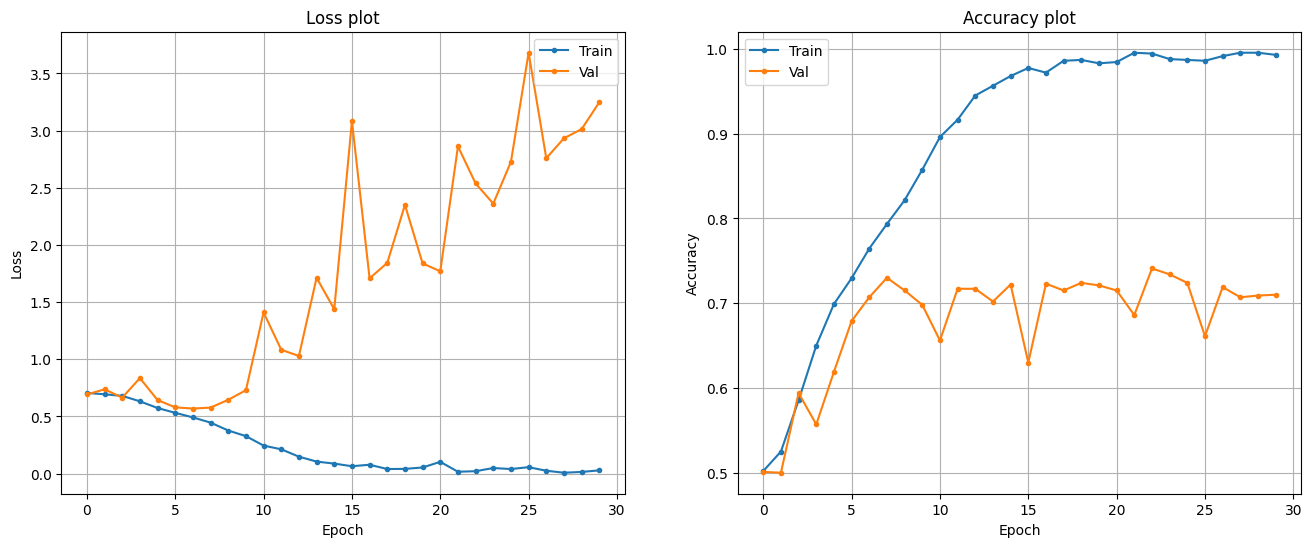

In [ ]:
plt.figure(figsize = (16,6))
ax1 = plt.subplot(1,2,1)
ax1.plot(history_dict['loss'],".-")
ax1.plot(history_dict['val_loss'],".-")
ax1.set_title("Loss plot")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend(["Train", "Val"])
ax1.grid()

ax2 = plt.subplot(1,2,2)
ax2.plot(history_dict['accuracy'],".-")
ax2.plot(history_dict['val_accuracy'],".-")
ax2.set_title("Accuracy plot")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend(["Train", "Val"])
ax2.grid()

In [ ]:
# model = models.Sequential()
# model.add(data_augmentation)
# model.add(layers.Rescaling(scale=1./255, input_shape=(150,150,3)))
# model.add(layers.Conv2D(32, (3,3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3,3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3,3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3,3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))
# model.compile(optimizer='rmsprop',
#                 loss='binary_crossentropy',
#                 metrics=['accuracy'])

In [ ]:
# ! pip install -q kaggle
# # # wgranie tokena
# from google.colab import files
# files.upload()


In [ ]:
# połączenie z dyskiem
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# ! kaggle competitions download -c 'dogs-vs-cats'
# ! unzip /content/drive/MyDrive/dogs-vs-cats.zip -d /content/drive/MyDrive/Dogs_vs_cats_database
# ! mkdir /content/drive/MyDrive/Dogs_vs_cats_database/train
#! unzip /content/drive/MyDrive/Dogs_vs_cats_database/train.zip -d /content/drive/MyDrive/Dogs_vs_cats_database/train

In [ ]:
# import os
# import shutil

In [ ]:
# for i in range(1,1001):
#   sciezka1 = os.path.join("/content/drive/MyDrive/Dogs_vs_cats_database/test/test1","{}.jpg".format(i) )
#   sciezka2 = os.path.join("/content/drive/MyDrive/Dogs_vs_cats_database/test_dvc","{}.jpg".format(i))
#   shutil.copy(sciezka1, sciezka2)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# drive.mount("/content/drive", force_remount=True)